In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt

import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Загрузка датасета

### Вывведим данные о признаках

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13344 entries, 0 to 13343
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13344 non-null  int64  
 1   Brand              13344 non-null  object 
 2   Year               13344 non-null  float64
 3   Model              13344 non-null  object 
 4   Car/Suv            13322 non-null  object 
 5   Title              13344 non-null  object 
 6   UsedOrNew          13344 non-null  object 
 7   Transmission       13344 non-null  object 
 8   Engine             13344 non-null  object 
 9   DriveType          13344 non-null  object 
 10  FuelType           13344 non-null  object 
 11  FuelConsumption    13344 non-null  object 
 12  Kilometres         13344 non-null  object 
 13  ColourExtInt       13344 non-null  object 
 14  Location           12987 non-null  object 
 15  CylindersinEngine  13344 non-null  object 
 16  BodyType           131

### Удалим заведомо ненужные признаки

In [6]:
train_data = train_data.drop(columns=['Unnamed: 0', 'Title'])

### Переведем `Year` в тип данных int

In [7]:
train_data['Year'] = train_data['Year'].astype(int)

In [8]:
train_data.head(5)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Mitsubishi,2003,Pajero,SUV,USED,Automatic,"4 cyl, 3.2 L",4WD,Diesel,0 L / 100 km,343128,Silver / Cream Leather,"Stanthorpe, QLD",4 cyl,SUV,4 Doors,7 Seats,9990
1,Honda,2017,CR-V,SUV,USED,Automatic,"4 cyl, 1.5 L",AWD,Unleaded,7.4 L / 100 km,130813,Blue / Black,"Ravenhall, VIC",4 cyl,SUV,4 Doors,5 Seats,34990
2,Honda,2014,Fit,USED Dealer ad,USED,-,-,Other,Other,-,44248,Black / Black,"Minchinbury, NSW",-,Hatchback,NaN,NaN,18995
3,Toyota,2010,Hiace,Commercial,USED,Automatic,"4 cyl, 3 L",Rear,Diesel,8 L / 100 km,147317,Silver / Grey,"Lidcombe, NSW",4 cyl,Commercial,4 Doors,3 Seats,25999
4,Mercedes-Benz,2015,CLA250,Sedan,USED,Automatic,"4 cyl, 2 L",AWD,Premium,6.6 L / 100 km,78403,Red / -,"Rozelle, NSW",4 cyl,Sedan,4 Doors,5 Seats,34800


In [9]:
train_data.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
       'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors',
       'Seats', 'Price'],
      dtype='object')

In [10]:
for column in train_data.columns:
    if column not in ['Year', 'Kilometres', 'Price']:
        print(f"{column} : {train_data[column].unique()}\n")

Brand : ['Mitsubishi' 'Honda' 'Toyota' 'Mercedes-Benz' 'Volkswagen' 'Jeep'
 'Suzuki' 'Kia' 'Nissan' 'Ford' 'Mazda' 'Land' 'BMW' 'Holden' 'Daihatsu'
 'Hyundai' 'Skoda' 'Volvo' 'Isuzu' 'Lexus' 'HSV' 'Subaru' 'Peugeot'
 'Renault' 'GWM' 'Audi' 'MG' 'Bentley' 'Chevrolet' 'Infiniti' 'Maserati'
 'Rover' 'LDV' 'Porsche' 'Mini' 'Chrysler' 'Dodge' 'Aston' 'Ssangyong'
 'Iveco' 'Chery' 'Fiat' 'Alfa' 'Saab' 'Jaguar' 'Citroen' 'Genesis' 'Ram'
 'Mahindra' 'Ferrari' 'Daewoo' 'Hino' 'Great' 'Ineos' 'Opel' 'Haval'
 'Tata' 'Cupra' 'McLaren' 'Tesla' 'Caterham' 'Abarth' 'Lamborghini'
 'Proton' 'FPV' 'Lotus' 'Foton' 'Polestar' 'Rolls-Royce' 'BYD' 'Geely'
 'Smart' 'Datsun' 'Hummer' 'International']

Model : ['Pajero' 'CR-V' 'Fit' 'Hiace' 'CLA250' 'Transporter' 'Corolla' 'Grand'
 'Baleno' 'Crown' 'Delica' 'Elgrand' 'Camry' 'Territory' '6' 'Rover'
 'Ranger' 'M2' 'Triton' 'Tarago' 'GLC250' 'Commodore' 'Carnival' 'Midget'
 'Yaris' 'Santa' 'Estima' 'Caravelle' 'Equinox' 'Tiguan' 'Superb' 'Xc'
 'BT-50' 'Dualis' 'K

In [11]:
train_data = train_data.replace({"-" : None, "- / -" : None})

# Car/Suv

In [12]:
train_data['Car/Suv'].value_counts().head(10)

Car/Suv
SUV                       4708
Hatchback                 1886
Ute / Tray                1679
Sedan                     1509
Wagon                      469
NEW Available to order     345
USED Dealer ad             258
Commercial                 250
Coupe                      210
NEW In stock                88
Name: count, dtype: int64

In [13]:
train_data.head(3)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Mitsubishi,2003,Pajero,SUV,USED,Automatic,"4 cyl, 3.2 L",4WD,Diesel,0 L / 100 km,343128,Silver / Cream Leather,"Stanthorpe, QLD",4 cyl,SUV,4 Doors,7 Seats,9990
1,Honda,2017,CR-V,SUV,USED,Automatic,"4 cyl, 1.5 L",AWD,Unleaded,7.4 L / 100 km,130813,Blue / Black,"Ravenhall, VIC",4 cyl,SUV,4 Doors,5 Seats,34990
2,Honda,2014,Fit,USED Dealer ad,USED,None,None,Other,Other,None,44248,Black / Black,"Minchinbury, NSW",None,Hatchback,NaN,NaN,18995


# Уберем пропуски

Можно либо заменять на моду/медиану/среднее, либо просто удалить строки, содержащие пустые значения

In [14]:
train_data = train_data.dropna()

# Разделение данных на X и y 

X (признаки для обучения)

y (целевая переменная)

In [15]:
X = train_data.drop('Price', axis=1)
y = train_data['Price'].values

# Кодировка признаков

In [16]:
categorical_features = ['Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 
                        'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats']

numeric_features = ['Year', 'Kilometres']

Обработка категориальных признаков

In [17]:
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

Обработка числовх признаков

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])

Объединение обработанных данных

In [19]:
X_final = np.hstack((X_scaled, X_encoded))

# Разделим данные на обучающую и тестовую выборку

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

И преобразуем в тензорный формат, чтобы передать в нейронную сеть

In [21]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [23]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Создадим нейронную сеть для решения нашей задачи

In [28]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 256)
        self.fc3 = nn.Linear(256, 1024)
        self.fc4 = nn.Linear(1024, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [29]:
input_size = X_train.shape[1]
model = MLP(input_size)

In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses = []
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  
        optimizer.step() 

    train_losses.append(loss.item())

    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.2f}')

tensor(2.3540e+08, grad_fn=<MseLossBackward0>)
Epoch [1/10], Loss: 235399200.00
tensor(1.7281e+08, grad_fn=<MseLossBackward0>)
Epoch [2/10], Loss: 172812208.00
tensor(68712168., grad_fn=<MseLossBackward0>)
Epoch [3/10], Loss: 68712168.00
tensor(6.6822e+08, grad_fn=<MseLossBackward0>)
Epoch [4/10], Loss: 668218880.00
tensor(2.1583e+08, grad_fn=<MseLossBackward0>)
Epoch [5/10], Loss: 215829264.00
tensor(5.3997e+08, grad_fn=<MseLossBackward0>)
Epoch [6/10], Loss: 539967872.00
tensor(1.7396e+08, grad_fn=<MseLossBackward0>)
Epoch [7/10], Loss: 173960912.00
tensor(1.0888e+08, grad_fn=<MseLossBackward0>)
Epoch [8/10], Loss: 108882016.00
tensor(4.1362e+08, grad_fn=<MseLossBackward0>)
Epoch [9/10], Loss: 413623552.00
tensor(1.0358e+08, grad_fn=<MseLossBackward0>)
Epoch [10/10], Loss: 103579152.00


/Users/timmiakov/Code/hse-ml-course/venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


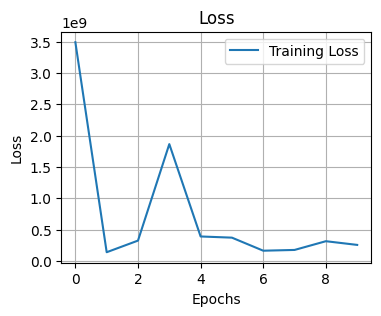

In [32]:
plt.figure(figsize=(4, 3))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test MSE: {test_loss.item():.4f}')

Test MSE: 927779456.0000


/Users/timmiakov/Code/hse-ml-course/venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([2236])) that is different to the input size (torch.Size([2236, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
